In [149]:
import datetime
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt

In [150]:
# get the stock symbols for portfolio

stock_symbols = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG']

In [151]:
# get stock starting date, form YYYY-mm-dd

stockStartDate = '2013-01-01'

In [152]:
# get today date in form YYYY-mm-dd
from datetime import date

today = date.today().strftime('%Y-%m-%d')

today

'2020-07-17'

In [153]:
numAssets = len(stock_symbols)

print("We have {} assests in the portfolio.".format(numAssets))

We have 5 assests in the portfolio.


In [154]:
def getMyPortfolio(stocks = stock_symbols, start = stockStartDate, end = today, col = 'Adj Close'):
    data = web.DataReader(stocks, 
                          data_source = 'yahoo',
                          start = start,
                          end = end)[col]
    return data

In [155]:
# now lets get the data of all the stocks

my_stocks = getMyPortfolio(stock_symbols)
my_stocks

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2012-12-31,26.620001,250.869995,66.398476,13.227143,352.369232
2013-01-02,28.000000,257.309998,68.502106,13.144286,360.274597
2013-01-03,27.770000,258.480011,67.637436,13.798572,360.483826
2013-01-04,28.760000,259.149994,65.753418,13.711429,367.607117
2013-01-07,29.420000,268.459991,65.366646,14.171429,366.003143
...,...,...,...,...,...
2020-07-10,245.070007,3200.000000,383.679993,548.729980,1541.739990
2020-07-13,239.000000,3104.000000,381.910004,525.500000,1511.339966
2020-07-14,239.729996,3084.000000,388.230011,524.880005,1520.579956


In [50]:
def plot_graphs(my_stocks, ylabel = 'Price in Dollars' ):    
    for i in range(len(my_stocks.columns)):
        my_stocks.iloc[:,i].plot()
        plt.title(my_stocks.columns[i])
        plt.ylabel(ylabel)
        plt.show()

In [38]:
def combined_plot_graphs(my_stocks):    
    for i in range(len(my_stocks.columns)):
        my_stocks.iloc[:,i].plot()
    plt.title('Portfolio performance of stocks')
    plt.ylabel('Adj closing price in Dollars')
    plt.legend(stock_symbols)
    plt.show()

### Combined stock performance

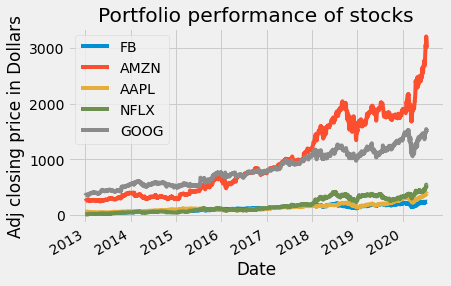

In [39]:
combined_plot_graphs(my_stocks)

### Individual stock performance

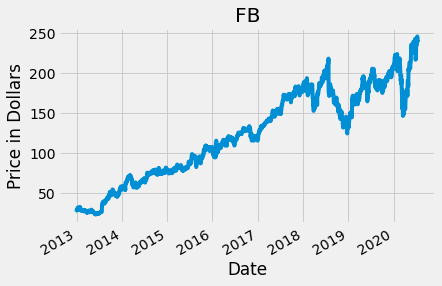

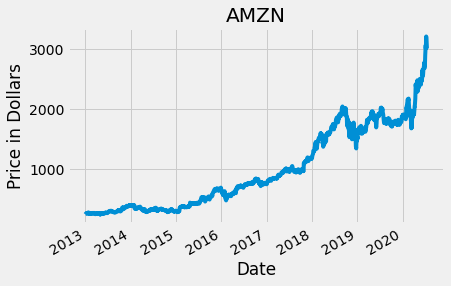

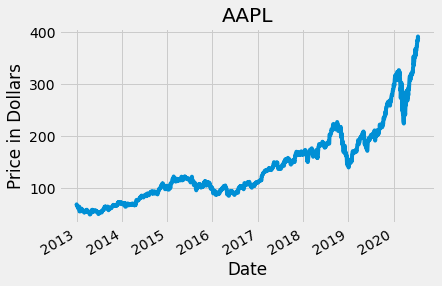

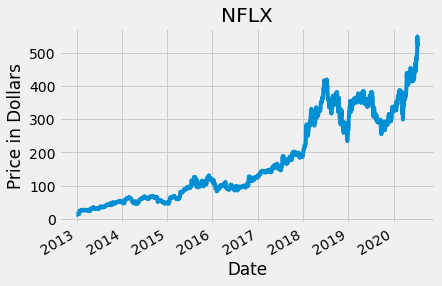

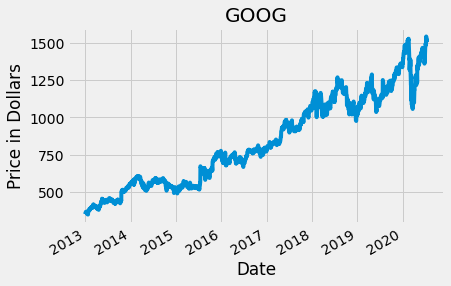

In [40]:
plot_graphs(my_stocks)

In [112]:
# calculate the simple returns 
daily_simple_returns = my_stocks.pct_change(periods=1)
daily_simple_returns

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2012-12-31,NaN,NaN,NaN,NaN,NaN
2013-01-02,0.051841,0.025671,0.031682,-0.006264,0.022435
2013-01-03,-0.008214,0.004547,-0.012623,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
...,...,...,...,...,...
2020-07-10,0.002331,0.005458,0.001749,0.080688,0.020351
2020-07-13,-0.024768,-0.030000,-0.004613,-0.042334,-0.019718
2020-07-14,0.003054,-0.006443,0.016548,-0.001180,0.006114


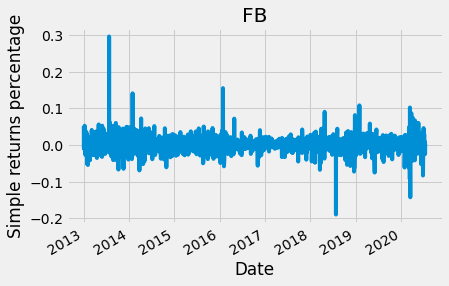

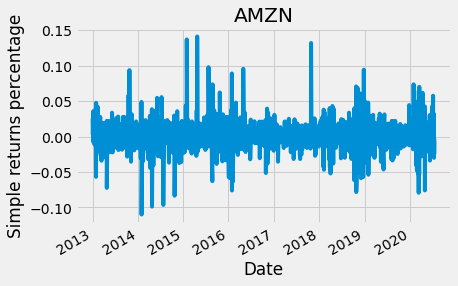

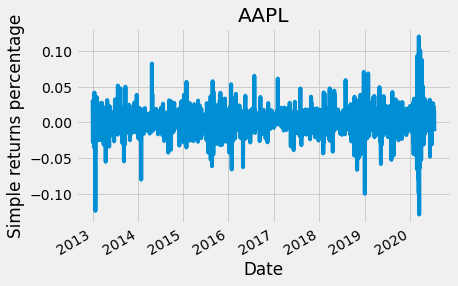

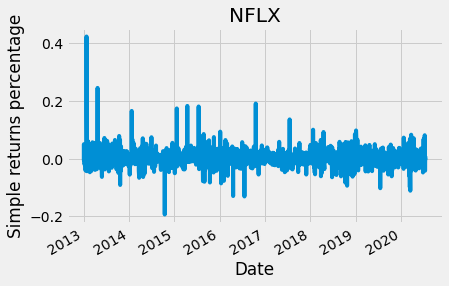

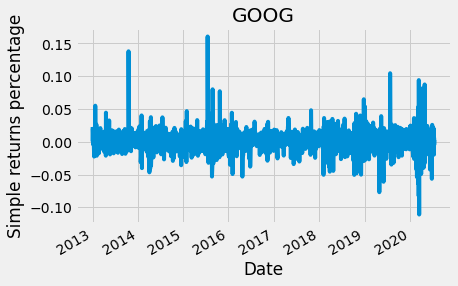

In [113]:
plot_graphs(daily_simple_returns, ylabel='Simple returns percentage')

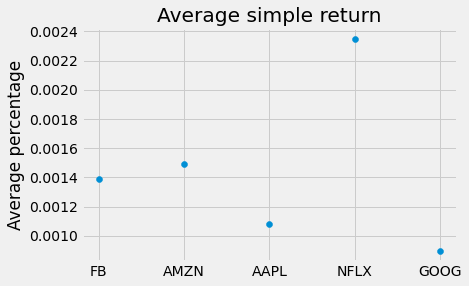

In [114]:
mean_list = [(np.mean(daily_simple_returns.iloc[:,i])) for i in range(len(daily_simple_returns.columns))]
plt.scatter(x = daily_simple_returns.columns, 
            y = mean_list)
plt.ylabel("Average percentage")
plt.title('Average simple return')
plt.show()

In [115]:
# Show the stocks correlation

daily_simple_returns.corr()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,1.000000,0.506036,0.436797,0.346953,0.564917
AMZN,0.506036,1.000000,0.427977,0.439854,0.603739
AAPL,0.436797,0.427977,1.000000,0.251007,0.533226
NFLX,0.346953,0.439854,0.251007,1.000000,0.417397
GOOG,0.564917,0.603739,0.533226,0.417397,1.000000


In [116]:
# show the corvariance matrix for simple returns
daily_simple_returns.cov()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,0.000464,0.000208,0.000164,0.000217,0.000195
AMZN,0.000208,0.000365,0.000142,0.000244,0.000185
AAPL,0.000164,0.000142,0.000303,0.000127,0.000149
NFLX,0.000217,0.000244,0.000127,0.000843,0.000195
GOOG,0.000195,0.000185,0.000149,0.000195,0.000258


* Higher the variance in the above chart, higher the risk and higher may be the reward
* Effecient frontier tries to maximum return versus the degree of risk for overall portfolio.

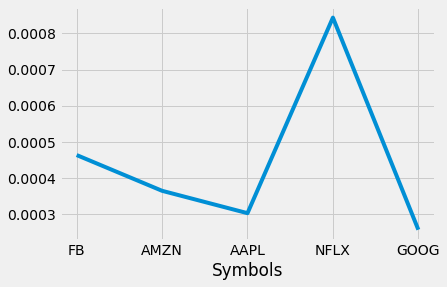

In [117]:
daily_simple_returns.var().plot()

Text(0.5, 1.0, 'Stock volatility')

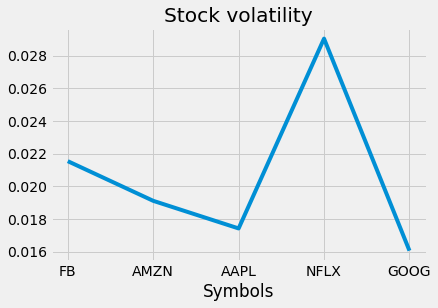

In [118]:
# Standard deviation for daily simple returns

daily_simple_returns.std().plot()
plt.title("Stock volatility")

In [120]:
# calculate the expected portfolio daily returns

randomWeights = np.array(np.repeat(0.2,numAssets))

print("Expected return from this portfolio is : {}".format(np.sum(np.sum((daily_simple_returns) * randomWeights, axis = 0))))

Expected return from this portfolio is : 2.7361490208842705


In [121]:
yearly_simple_returns = my_stocks.pct_change(periods=253)
print("Expected return from this portfolio for every year is : {}".format(np.sum(np.sum((yearly_simple_returns) * randomWeights, axis = 0))))

Expected return from this portfolio for every year is : 569.8865659594214


In [122]:
# calculate the growth of the investment
daily_cumulative = (daily_simple_returns + 1).cumprod()
daily_cumulative

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2012-12-31,NaN,NaN,NaN,NaN,NaN
2013-01-02,1.051841,1.025671,1.031682,0.993736,1.022435
2013-01-03,1.043201,1.030335,1.018659,1.043201,1.023029
2013-01-04,1.080391,1.033005,0.990285,1.036613,1.043244
2013-01-07,1.105184,1.070116,0.984460,1.071390,1.038692
...,...,...,...,...,...
2020-07-10,9.206236,12.755611,5.778446,41.485147,4.375354
2020-07-13,8.978212,12.372942,5.751789,39.728911,4.289080
2020-07-14,9.005634,12.293220,5.846972,39.682038,4.315303


Text(0.5, 1.0, 'Daily Cumulative Simple Returns')

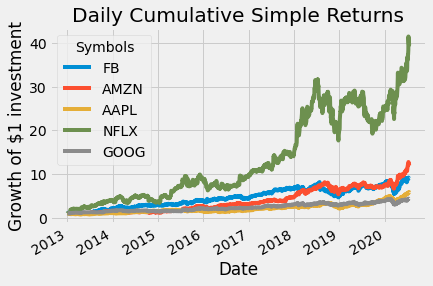

In [130]:
# plot growth of investment
daily_cumulative.plot()
plt.ylabel('Growth of $1 investment')
plt.title('Daily Cumulative Simple Returns')